In [3]:
%run setup.py

In [2]:
df = pd.read_csv('../data/all_confirmed_planets.csv')

/Users/danielhey/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (140,246) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,...,st_bmy,st_bmyerr,st_bmylim,st_m1,st_m1err,st_m1lim,st_c1,st_c1err,st_c1lim,st_colorn
0,11 Com,b,11 Com b,Radial Velocity,0,1,326.030000,0.320000,-0.320000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,11 UMi,b,11 UMi b,Radial Velocity,0,1,516.219970,3.200000,-3.200000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,14 And,b,14 And b,Radial Velocity,0,1,185.840000,0.230000,-0.230000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,14 Her,b,14 Her b,Radial Velocity,0,1,1773.400020,2.500000,-2.500000,0.0,...,0.537,0.001,0.0,0.366,0.002,0.0,0.438,0.006,0.0,9
4,16 Cyg B,b,16 Cyg B b,Radial Velocity,0,1,798.500000,1.000000,-1.000000,0.0,...,0.418,0.003,0.0,0.222,0.003,0.0,0.351,0.003,0.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,tau Gem,b,tau Gem b,Radial Velocity,0,1,305.500000,0.100000,-0.100000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4100,ups And,b,ups And b,Radial Velocity,0,3,4.617033,0.000023,-0.000023,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
4101,ups And,c,ups And c,Radial Velocity,0,3,241.258000,0.064000,-0.064000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
4102,ups And,d,ups And d,Radial Velocity,0,3,1276.460000,0.570000,-0.570000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


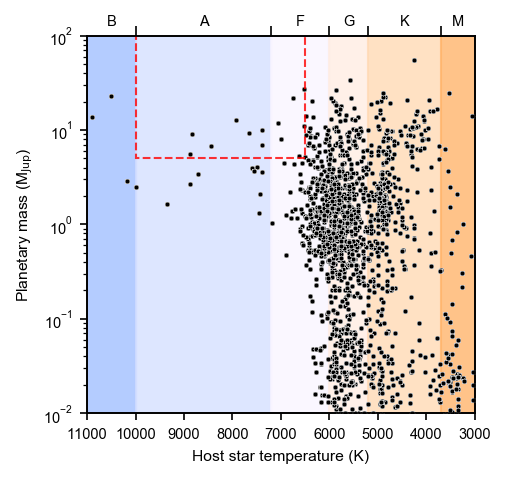

In [6]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=mnras_size(240., square=True))

mask = np.ones_like(df, dtype=bool)
ax.scatter((df[mask]['st_teff']), (df[mask]['pl_bmassj']), 5,facecolors='black', edgecolors='white', alpha=0.8, linewidth=0.2, rasterized=True, label='Confirmed', zorder=50)

# ax.set_yscale('log')
ax.set_xlabel('Host star temperature (K)')
ax.set_ylabel(r'Planetary mass (M$_{\rm Jup}$)')

# https://en.wikipedia.org/wiki/Stellar_classification#Harvard_spectral_classification
colors = np.array([
    [146,181,255],
    [162,192,255],
    [213,224,255],
    [249,245,255],
    [255,237,227],
    [255,218,181],
    [255,181,108]
]) / 255

classes = np.array([
    [30000, 50000],
    [10000,11000],
    [7200,10000],
    [6000,7200],
    [5200,6000],
    [3700,5200],
    [3000,3700]
])

for color, sptype in zip(colors, classes):
    ax.axvspan(sptype[0], sptype[1], color=color, zorder=1, alpha=0.8)

ax.set_xlim(11000,3000)
ax2 = ax.twiny()
ax2.set_xlim(11000,3000)

rect = Rectangle((6500,5), 10000-6500,10000, alpha=0.8, fill=False, color='red', linestyle='dashed', zorder=80)
ax.add_patch(rect)

# Major ticks
ticks2 = [3700,5200,6000,7200,10000]
ax2.set_xticks(ticks2)
ax2.set_xticklabels([])
ax2.tick_params(axis='x', which="major", length=5)
ax2.set_xlim(11000,3000)

# Minor ticks
ticks1 = np.average(classes, axis=1)
labs = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
ax2.set_xticks(ticks1, minor=True)
ax2.set_xticklabels(labs, minor=True)
ax2.tick_params(axis='x', which="minor",length=0)
ax2.set_xlim(11000,3000)

ax.set_yscale('log')
ax.set_ylim(10e-3, 100)
plt.savefig('pm_suitability.png', dpi=300, bbox_inches='tight', pad_inches=0)
# plt.savefig(overleaf_path + 'all_koi.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

In [37]:
np.unique(df['pl_discmethod'])

array(['Astrometry', 'Disk Kinematics', 'Eclipse Timing Variations',
       'Imaging', 'Microlensing', 'Orbital Brightness Modulation',
       'Pulsar Timing', 'Pulsation Timing Variations', 'Radial Velocity',
       'Transit', 'Transit Timing Variations'], dtype=object)

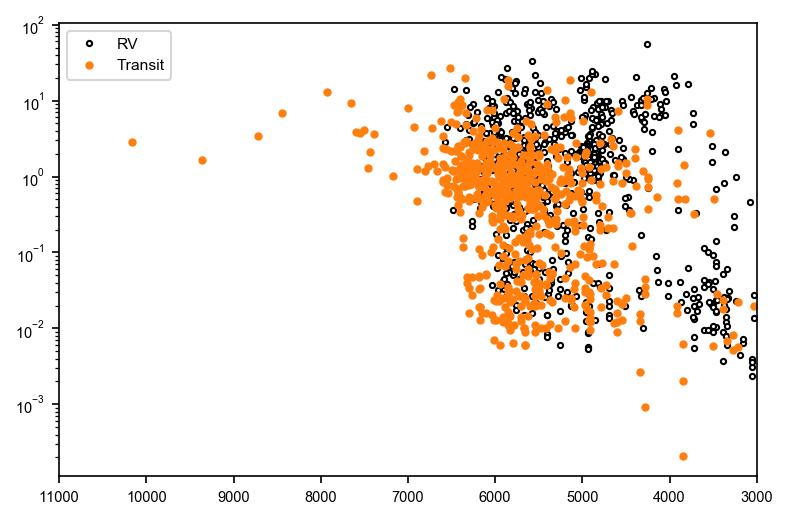

In [68]:

mask = df['pl_discmethod'] == 'Radial Velocity'
plt.plot((df[mask]['st_teff']), (df[mask]['pl_bmassj']), '.', label='RV', markersize=5, markerfacecolor='white', markeredgecolor='black', linewidth=0.5)

mask = df['pl_discmethod'] == 'Transit'
plt.plot((df[mask]['st_teff']), (df[mask]['pl_bmassj']), '.', label='Transit')
    

plt.yscale('log')
plt.xlim(11000,3000)
plt.legend()

In [48]:
df[df['pl_discmethod'] == 'Pulsation Timing Variations']

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,...,st_bmy,st_bmyerr,st_bmylim,st_m1,st_m1err,st_m1lim,st_c1,st_c1err,st_c1lim,st_colorn
1336,KIC 7917485,b,KIC 7917485 b,Pulsation Timing Variations,0,1,840.0,22.0,-20.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3874,V0391 Peg,b,V0391 Peg b,Pulsation Timing Variations,0,1,1170.0,44.0,-44.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [6]:
import lightkurve as lk
lk.search_lightcurvefile('HD 312085')

SearchResult containing 0 data products.

In [13]:
search = Observations.query_object('HD 312085', radius=0.)

In [32]:
from astroquery.mast import Observations

def lc_downloader(star_id):
    search = Observations.query_object('HD 312085', radius=0.)
    data_products = Observations.get_product_list(search[search['provenance_name'] == 'CDIPS'])
    manifest = Observations.download_products(data_products)
    return manifest

In [24]:
data_products = Observations.get_product_list(search[search['provenance_name'] == 'CDIPS'])
manifest = Observations.download_products(data_products)

In [34]:
import lightkurve as lk
lc = lk.LightCurveFile(manifest['Local Path'][0])

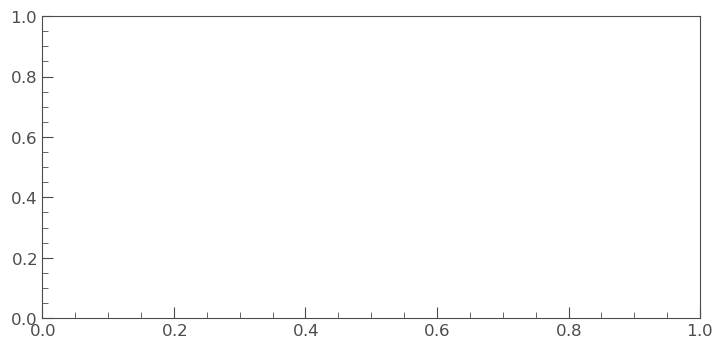

In [40]:
lc.plot()

In [41]:
from astropy.io import fits
fits_image_filename = fits.util.get_testdata_filepath('test0.fits')

hdul = fits.open(manifest['Local Path'][0])

In [44]:
hdul.info()

Filename: ./mastDownload/HLSP/hlsp_cdips_tess_ffi_gaiatwo0006056028754989290368-0011-cam2-ccd1_tess_v01_llc/hlsp_cdips_tess_ffi_gaiatwo0006056028754989290368-0011-cam2-ccd1_tess_v01_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     103   ()      
  1                1 BinTableHDU    113   1182R x 34C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 1A, 1A, 1A, 48A, D, D, D, D, J, D, D, D, D, D, D, D, D]   


In [61]:
hdul[1].data[-7]

(0.73, 0.53, 0.0543976908, -0.0325489263, 1.57967725, 30.68, 37.19, 40.99, 4989.7, 7323.56, 8877.72, 0.00668, 0.00551, 0.00501, 10.713, 10.29638, 10.08743, 'G', 'G', 'G', 'tess2019140052932-s0011-2-1-0143_cal_img_bkgdsub', 2458623.7392609, 1823.2, 945.138124, -80.80470125, 24, 2458623.7437691167, 0.003707462563329531, 10.707677710114506, 10.289274851479215, 10.080918688571527, 10.707220073896284, 10.289690973106435, 10.079731206093346)

In [50]:
dir(hdul[0])

['_EXCLUDE',
 '_MASK',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_axes',
 '_bitpix',
 '_blank',
 '_bscale',
 '_buffer',
 '_bzero',
 '_calculate_checksum',
 '_calculate_datasum',
 '_char_encode',
 '_checksum',
 '_checksum_valid',
 '_close',
 '_compute_checksum',
 '_compute_hdu_checksum',
 '_convert_pseudo_unsigned',
 '_data_loaded',
 '_data_needs_rescale',
 '_data_offset',
 '_data_replaced',
 '_data_size',
 '_datasum',
 '_datasum_valid',
 '_default_name',
 '_do_not_scale_image_data',
 '_dtype_for_bitpix',
 '_encode_byte',
 '_file',
 '_from_data',
 '_gcount',
 '_get_raw_data',
 '_get_scaled_image_data',
 '_get_timestamp',
 '_has_data',
 '_hdu_registry',
 '_header'